# KNN - clusterização de vinhos - usando da lib MiniSom

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from minisom import MiniSom

In [2]:
base = pd.read_csv('../bases/iris.csv')
entradas = base.iloc[:, 0:len(base.columns) -1].values 
classes = base.iloc[:,len(base.columns)-1].values
NumColunas = len(base.columns) - 1

In [3]:
for i in range (len(base.columns)-1):
    entradas[:,i] = (entradas[:,i] - np.median(entradas[:,i]))/entradas[:,i].std(axis = 0)

In [4]:
labelEncoder = LabelEncoder()
classes = labelEncoder.fit_transform(classes)
classes_dummy = np.array(pd.get_dummies(classes))

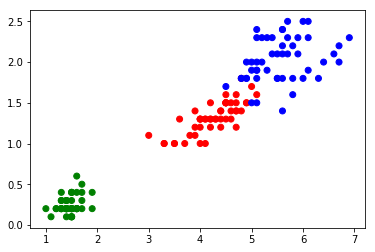

In [5]:
x = base.iloc[:,2].values
y = base.iloc[:,3].values

color= ['red' if l == 1 else 'blue' if l == 2 else 'green' for l in classes]
plt.scatter(x, y, color=color)

## Treinamento da rede SOM

In [6]:
som = MiniSom(x = 10, y= 10, input_len = 4, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(entradas)
som.train_random(data = entradas, num_iteration = 100)